# Description

It projects input data into a UMAP representation.

# Modules loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from IPython.display import display

import numpy as np
import pandas as pd

import conf
from utils import generate_result_set_name

# Settings

In [3]:
np.random.seed(0)

## Input data

In [4]:
INPUT_FILEPATH_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [5]:
INPUT_FILEPATH = Path(
    conf.RESULTS["CLUSTERING_NULL_DIR"],
    "data_transformations",
    "z_score_std",
    f"z_score_std-{INPUT_FILEPATH_STEM}.pkl",
).resolve()
display(INPUT_FILEPATH)

input_filepath_stem = INPUT_FILEPATH.stem
display(input_filepath_stem)

PosixPath('/opt/data/results/clustering/null_sims/data_transformations/z_score_std/z_score_std-projection-smultixcan-efo_partial-mashr-zscores.pkl')

'z_score_std-projection-smultixcan-efo_partial-mashr-zscores'

## Output folder

In [6]:
# output dir for this notebook
RESULTS_DIR = Path(
    conf.RESULTS["CLUSTERING_NULL_DIR"], "data_transformations", "umap"
).resolve()
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

display(RESULTS_DIR)

PosixPath('/opt/data/results/clustering/null_sims/data_transformations/umap')

## UMAP options

In [7]:
# parameters of the dimentionality reduction steps
# note that these are the default parameters of UMAP (metric and n_neighbors)
DR_OPTIONS = {
    "n_components": [5, 10, 20, 30, 40, 50],
    "metric": "euclidean",
    "n_neighbors": 15,
    "random_state": 0,
}

In [8]:
# dictionary containing all options/settings (used to generate filenames)
ALL_OPTIONS = DR_OPTIONS.copy()

display(ALL_OPTIONS)

{'n_components': [5, 10, 20, 30, 40, 50],
 'metric': 'euclidean',
 'n_neighbors': 15,
 'random_state': 0}

# Load input file

In [9]:
data = pd.read_pickle(INPUT_FILEPATH)

In [10]:
display(data.shape)

(3752, 987)

In [11]:
display(data.head())

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV978,LV979,LV980,LV981,LV982,LV983,LV984,LV985,LV986,LV987
100001_raw-Food_weight,-2.408007,-1.745911,1.383013,0.158718,-0.240933,-0.304911,1.823117,-0.716278,-1.769346,-0.043794,...,0.399227,0.849885,-0.593292,0.636568,0.409726,-0.871713,1.638770,0.285165,0.585307,0.592347
100002_raw-Energy,-0.508508,0.514427,-0.792865,-0.091775,-0.013409,0.194047,1.353713,0.117286,-0.323516,-1.641116,...,-0.038535,-1.139394,-0.951591,1.197872,0.893819,-0.820655,0.928634,-0.716778,-0.085735,-1.208965
100003_raw-Protein,-0.284597,-0.325076,-1.412980,1.255510,0.343603,-2.471878,-0.149640,-0.715178,-0.548948,1.210352,...,1.006094,0.595064,1.774559,-0.335165,0.394177,-0.188345,-1.864716,-0.124875,1.253625,0.804944
100004_raw-Fat,-0.427503,-0.096524,-0.348654,-1.250087,-0.253145,-0.236606,-0.600627,0.277239,-0.844748,-0.998437,...,0.249993,-1.520660,0.037241,0.514992,0.512538,-1.083619,0.310643,-1.719033,-0.970770,-2.628077
100005_raw-Carbohydrate,-1.502621,-1.083034,0.531159,0.332981,-1.240640,-0.852565,-0.003171,0.561912,-0.772413,-0.372739,...,-0.577730,-1.163380,0.000251,-0.345607,-1.610004,0.194078,0.605594,1.182825,-1.567705,-0.011902


# UMAP

**Reproducibility problem**: there seems to be a bug with UMAP in which it produces different results in different operating systems or machines: https://github.com/lmcinnes/umap/issues/153

In [12]:
from data.dimreduction import get_umap_proj

In [13]:
# Get a UMAP representation for all n_components configurations
for n_comp in DR_OPTIONS["n_components"]:
    print(f"# components: {n_comp}")

    # prepare options of n_comp
    options = ALL_OPTIONS.copy()
    options["n_components"] = n_comp
    options = {k: v for k, v in options.items() if k in DR_OPTIONS}

    # get projection
    dr_data = get_umap_proj(data, options)

    # check data dimensionality
    display(dr_data.shape)
    assert dr_data.shape == (data.shape[0], n_comp)

    display(dr_data.iloc[:, 0:5].describe())

    # save
    output_file = Path(
        RESULTS_DIR,
        generate_result_set_name(
            options, prefix=f"umap-{input_filepath_stem}-", suffix=".pkl"
        ),
    ).resolve()
    display(output_file)

    dr_data.to_pickle(output_file)

    print("\n")

# components: 5


'UMAP object: UMAP(n_components=5, random_state=0)'

(3752, 5)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000
mean,6.999101,4.547689,5.322808,3.112285,4.965230
std,1.341713,0.944433,0.937953,1.364720,0.755761
min,4.472590,2.433340,3.323093,0.771240,3.330042
25%,5.755208,3.935219,4.539842,1.858546,4.333062
50%,7.036210,4.545371,5.338401,2.906190,5.043364
75%,8.114816,5.155732,5.962601,4.339421,5.532559
max,9.547574,6.933406,7.739208,5.625118,6.699116


PosixPath('/opt/data/results/clustering/null_sims/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_5-n_neighbors_15-random_state_0.pkl')



# components: 10


'UMAP object: UMAP(n_components=10, random_state=0)'

(3752, 10)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000
mean,7.238214,4.277183,5.471607,3.074549,4.983744
std,0.902886,0.422010,0.920810,0.605338,0.586626
min,5.846238,3.209408,3.508688,1.094163,3.360522
25%,6.292350,3.983890,4.589895,2.801221,4.642928
50%,7.175763,4.249910,5.842641,3.221134,4.959365
75%,8.109381,4.523397,6.250826,3.519061,5.357267
max,8.870227,5.505721,6.849693,4.196908,6.508170


PosixPath('/opt/data/results/clustering/null_sims/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_10-n_neighbors_15-random_state_0.pkl')



# components: 20


'UMAP object: UMAP(n_components=20, random_state=0)'

(3752, 20)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000
mean,2.817539,5.576835,4.570601,6.885715,4.791191
std,0.683601,0.466359,0.676089,0.270901,0.307192
min,1.383449,4.449450,3.377799,6.230277,3.999923
25%,2.230855,5.322400,4.020866,6.699193,4.596777
50%,2.908567,5.457688,4.442530,6.909359,4.784199
75%,3.458219,5.758371,5.001724,7.091442,5.022699
max,3.941043,6.709205,6.360288,7.496960,5.631107


PosixPath('/opt/data/results/clustering/null_sims/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_20-n_neighbors_15-random_state_0.pkl')



# components: 30


'UMAP object: UMAP(n_components=30, random_state=0)'

(3752, 30)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000
mean,7.135530,4.448678,4.517171,6.884650,4.864924
std,0.394276,0.359385,0.484471,0.355156,0.496768
min,6.456857,3.759423,3.613495,6.211313,3.700074
25%,6.810970,4.189213,4.078454,6.577570,4.443915
50%,7.089606,4.365593,4.511808,6.896932,4.831998
75%,7.329640,4.626651,4.883044,7.147523,5.368758
max,8.091588,5.462718,5.646866,7.738770,5.853499


PosixPath('/opt/data/results/clustering/null_sims/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_30-n_neighbors_15-random_state_0.pkl')



# components: 40


'UMAP object: UMAP(n_components=40, random_state=0)'

(3752, 40)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000
mean,2.906262,5.551383,4.456803,6.900380,4.713815
std,0.330252,0.270267,0.488327,0.226085,0.322921
min,2.284712,4.783645,3.595176,6.207615,4.002125
25%,2.631690,5.500333,4.005049,6.799776,4.463559
50%,2.815758,5.640155,4.435836,6.935835,4.663975
75%,3.242679,5.714612,4.776666,7.041055,5.039686
max,3.599759,6.039315,5.506421,7.388603,5.377121


PosixPath('/opt/data/results/clustering/null_sims/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_40-n_neighbors_15-random_state_0.pkl')



# components: 50


'UMAP object: UMAP(n_components=50, random_state=0)'

(3752, 50)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000
mean,7.128797,4.400824,4.570011,6.896926,4.799375
std,0.184620,0.676859,0.418681,0.498881,0.387925
min,6.707595,3.251304,3.622285,5.318419,4.225804
25%,6.981378,3.723922,4.248200,6.660778,4.451050
50%,7.107937,4.496595,4.479031,7.013451,4.704602
75%,7.283900,4.925959,4.933706,7.243094,5.071007
max,7.569786,5.777393,5.432302,7.703011,5.601362


PosixPath('/opt/data/results/clustering/null_sims/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_50-n_neighbors_15-random_state_0.pkl')

## Plots

In [14]:
import seaborn as sns

Plot the data from the UMAP version with 5 components.

In [15]:
# prepare options of 5 components
options = ALL_OPTIONS.copy()
options["n_components"] = 5
options = {k: v for k, v in options.items() if k in DR_OPTIONS}

# load
input_file = Path(
    RESULTS_DIR,
    generate_result_set_name(
        options, prefix=f"umap-{input_filepath_stem}-", suffix=".pkl"
    ),
).resolve()

dr_data = pd.read_pickle(input_file)

## Full plot

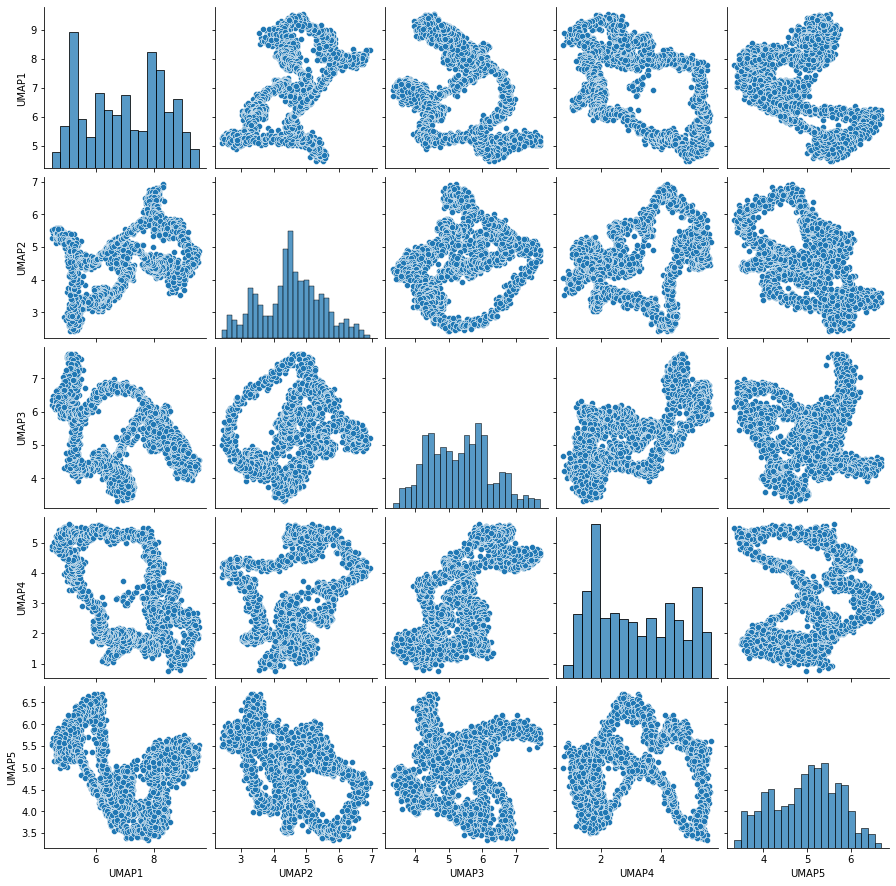

In [16]:
g = sns.pairplot(data=dr_data)

## Full plot (density)

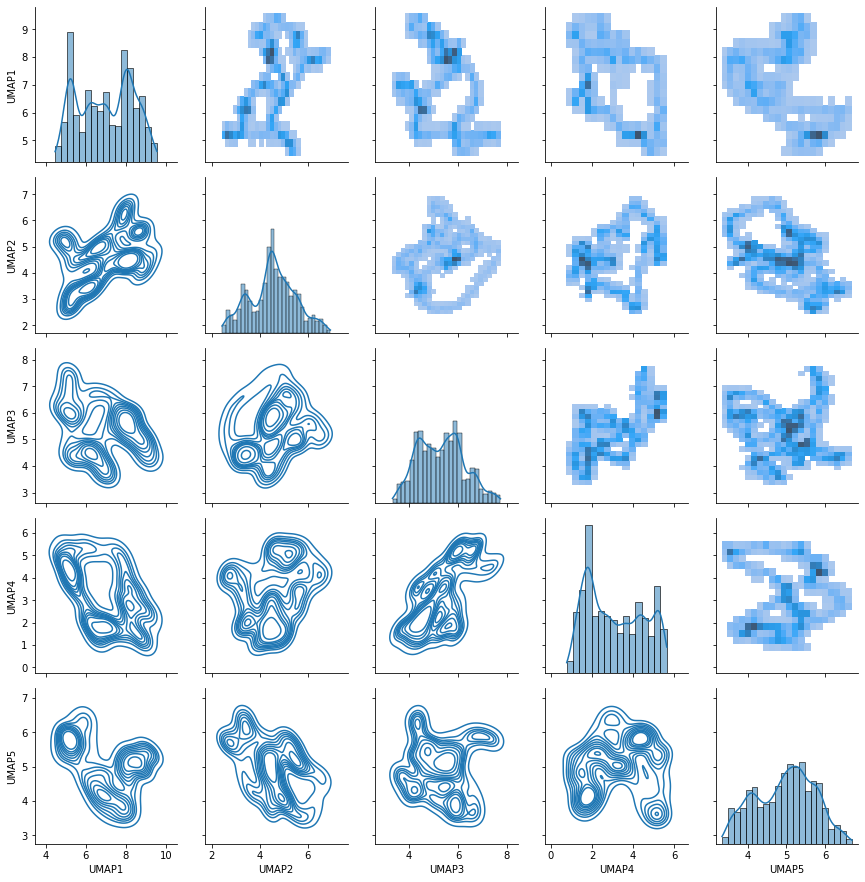

In [17]:
g = sns.PairGrid(data=dr_data)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=False)
g.map_diag(sns.histplot, kde=True)

## Density plot without "outliers"

In [18]:
# remove "outliers" just to take a look at the big cluster
dr_data_thin = dr_data[(dr_data["UMAP1"] < 10) & (dr_data["UMAP2"] < 5)]

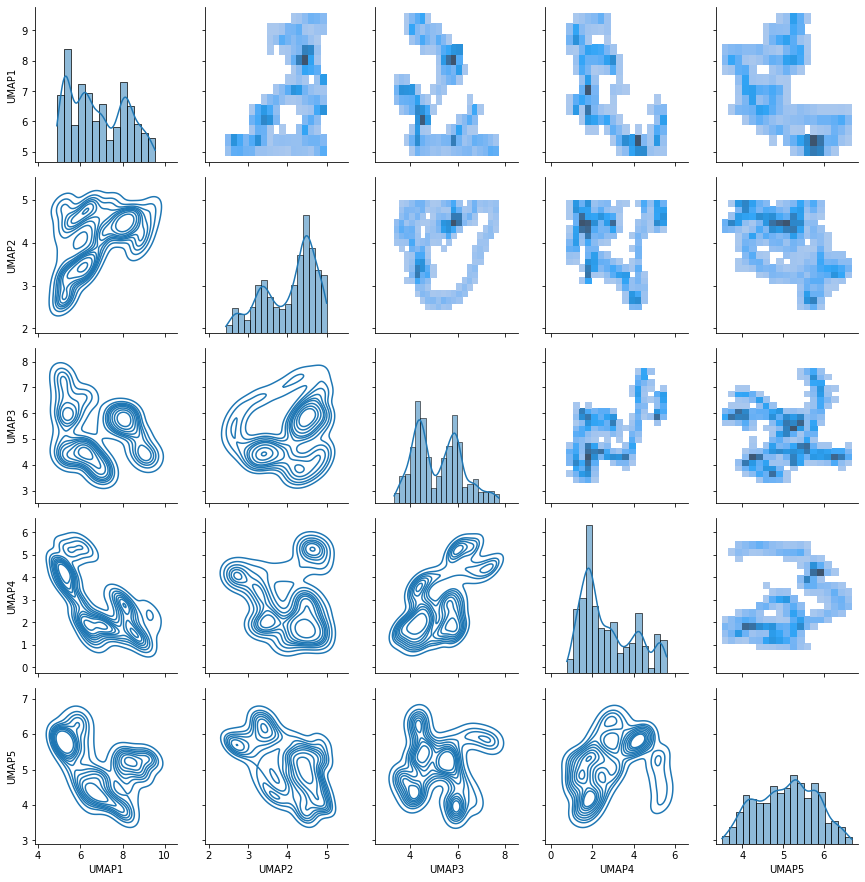

In [19]:
g = sns.PairGrid(data=dr_data_thin)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=False)
g.map_diag(sns.histplot, kde=True)